In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


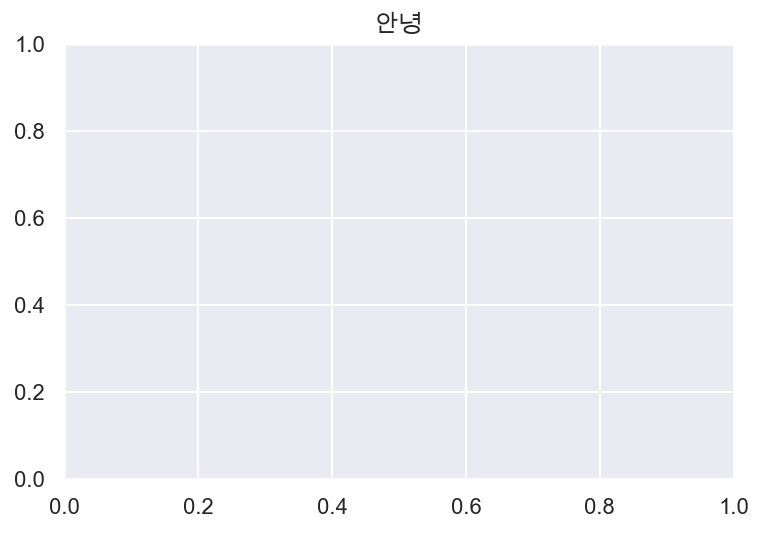

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('안녕');

In [4]:
from matplotlib import font_manager

f_path = '/Library/Fonts/Arial Unicode.ttf'
font_manager.FontProperties(fname=f_path).get_name()

'Arial Unicode MS'

In [1]:
# matplotlib 한글 코드
from matplotlib import rc

rc('font', family='Arial Unicode MS')

# 서울시 남여 운동을 하지 않는 이유 통계

In [15]:
import pandas as pd

raw_data = pd.read_csv('./data/report.txt', sep='\t')
raw_data.head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


## 1. 데이터 type 확인 -> float으로

In [16]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   기간                 52 non-null     int64  
 1   대분류                52 non-null     object 
 2   분류                 52 non-null     object 
 3   운동을 할 충분한 시간이 없어서  52 non-null     float64
 4   함께 운동을 할 사람이 없어서   52 non-null     float64
 5   운동을 할 만한 장소가 없어서   52 non-null     float64
 6   운동을 싫어해서           52 non-null     float64
 7   운동을 할 충분한 비용이 없어서  52 non-null     float64
 8   기타                 52 non-null     object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.8+ KB


In [17]:
raw_data.loc[raw_data['기타'].isin(['-']), '기타'] = 0 
raw_data.head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,0
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


In [18]:
raw_data['기타'] = raw_data['기타'].astype('float')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   기간                 52 non-null     int64  
 1   대분류                52 non-null     object 
 2   분류                 52 non-null     object 
 3   운동을 할 충분한 시간이 없어서  52 non-null     float64
 4   함께 운동을 할 사람이 없어서   52 non-null     float64
 5   운동을 할 만한 장소가 없어서   52 non-null     float64
 6   운동을 싫어해서           52 non-null     float64
 7   운동을 할 충분한 비용이 없어서  52 non-null     float64
 8   기타                 52 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.8+ KB


## 2. 안쓰는 데이터 삭제

### 1. 대분류 == 서울시

In [19]:
raw_data['대분류'].unique()

array(['서울시', '성별', '연령별', '학력별', '소득별', '혼인상태별', '지역대분류', '종로구', '중구',
       '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구',
       '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [20]:
raw_data.loc[raw_data['분류'] == '서울시']

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,서울시,46.8,5.0,4.3,37.3,5.2,1.4


In [21]:
raw_data.drop(0, inplace=True)
raw_data.head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,0.0
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1
5,2019,연령별,30대,59.9,5.2,2.9,27.3,4.5,0.2


In [22]:
raw_data.drop(columns='기간', inplace=True)
raw_data.head()

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,연령별,10대,55.3,4.8,3.9,32.6,3.5,0.0
4,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1
5,연령별,30대,59.9,5.2,2.9,27.3,4.5,0.2


## 3. 성별기준

In [34]:
raw_data_sex = raw_data[raw_data['대분류'] == '성별']
raw_data_sex

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7


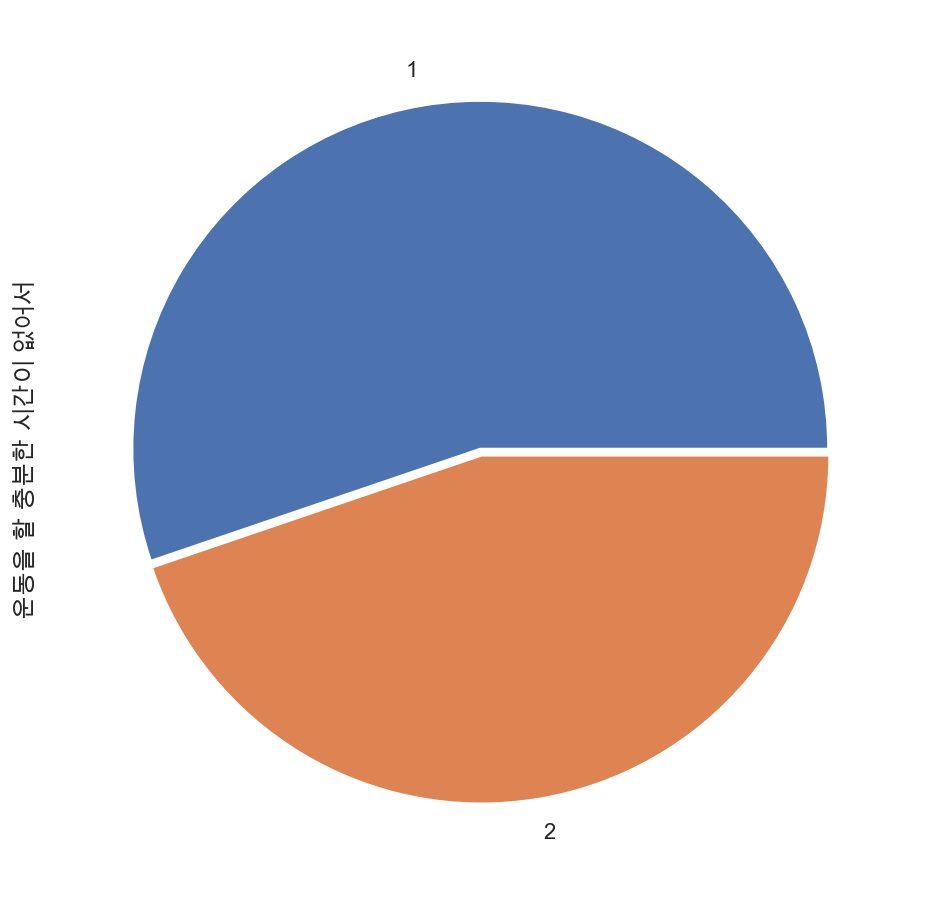

In [35]:
plt.figure(figsize=(10,8))
raw_data_sex['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0,0.02])
plt.show()

In [37]:
## index를 바로 넣을래
raw_data_sex = raw_data[raw_data['대분류'] == '성별'].set_index('분류')
raw_data_sex

,대분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
분류,,,,,,,
남자,성별,52.4,4.4,4.9,32.4,4.9,1.1
여자,성별,42.5,5.6,3.9,41.0,5.4,1.7


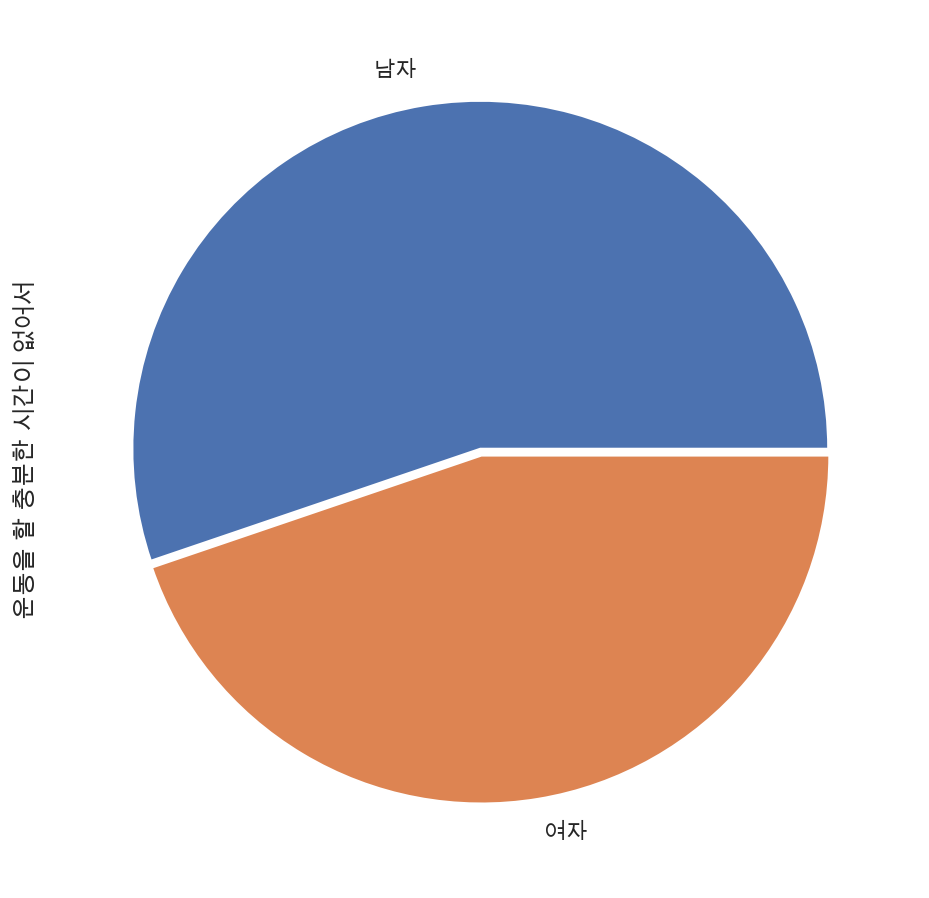

In [38]:
plt.figure(figsize=(10,8))
raw_data_sex['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0,0.02]);

In [ ]:
## quiz : 가로 기준으론 어떻게 출력??
# plt.figure(figsize=(10,8))
# raw_data_sex['남자'].plot.pie(explode=[0,0.02]);

### 4. 두 개 동시에 그리고 싶다

2

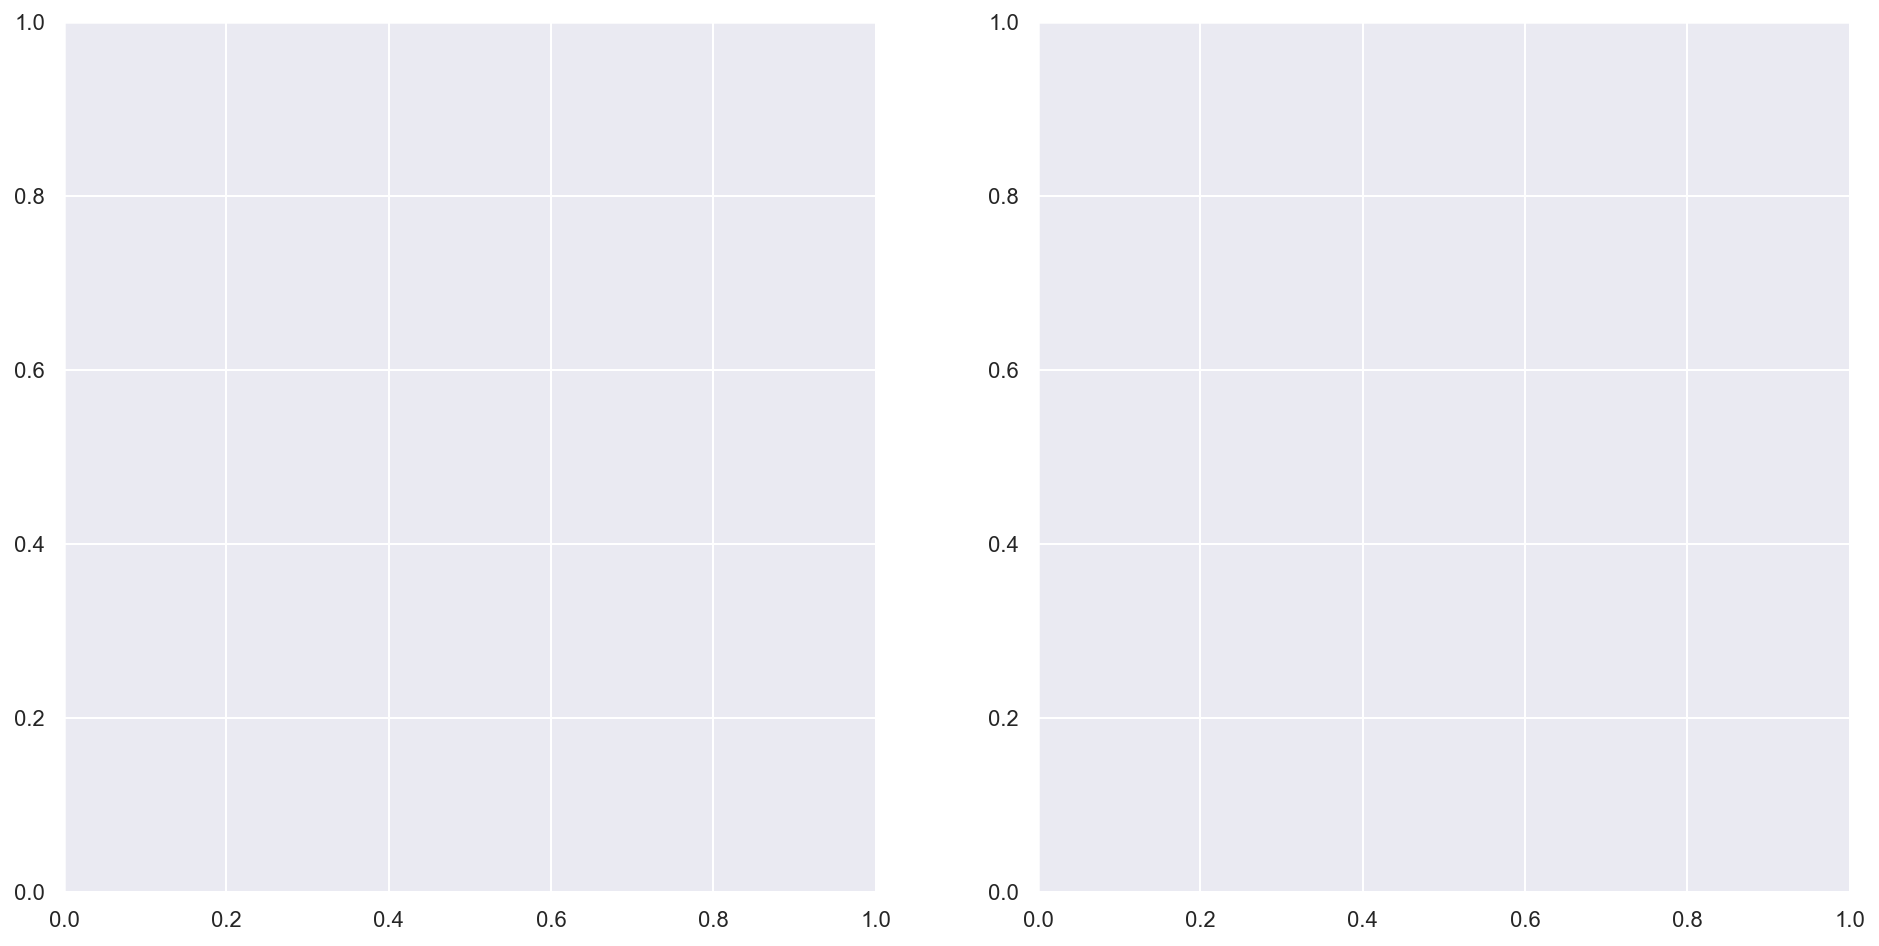

In [49]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
len(ax)

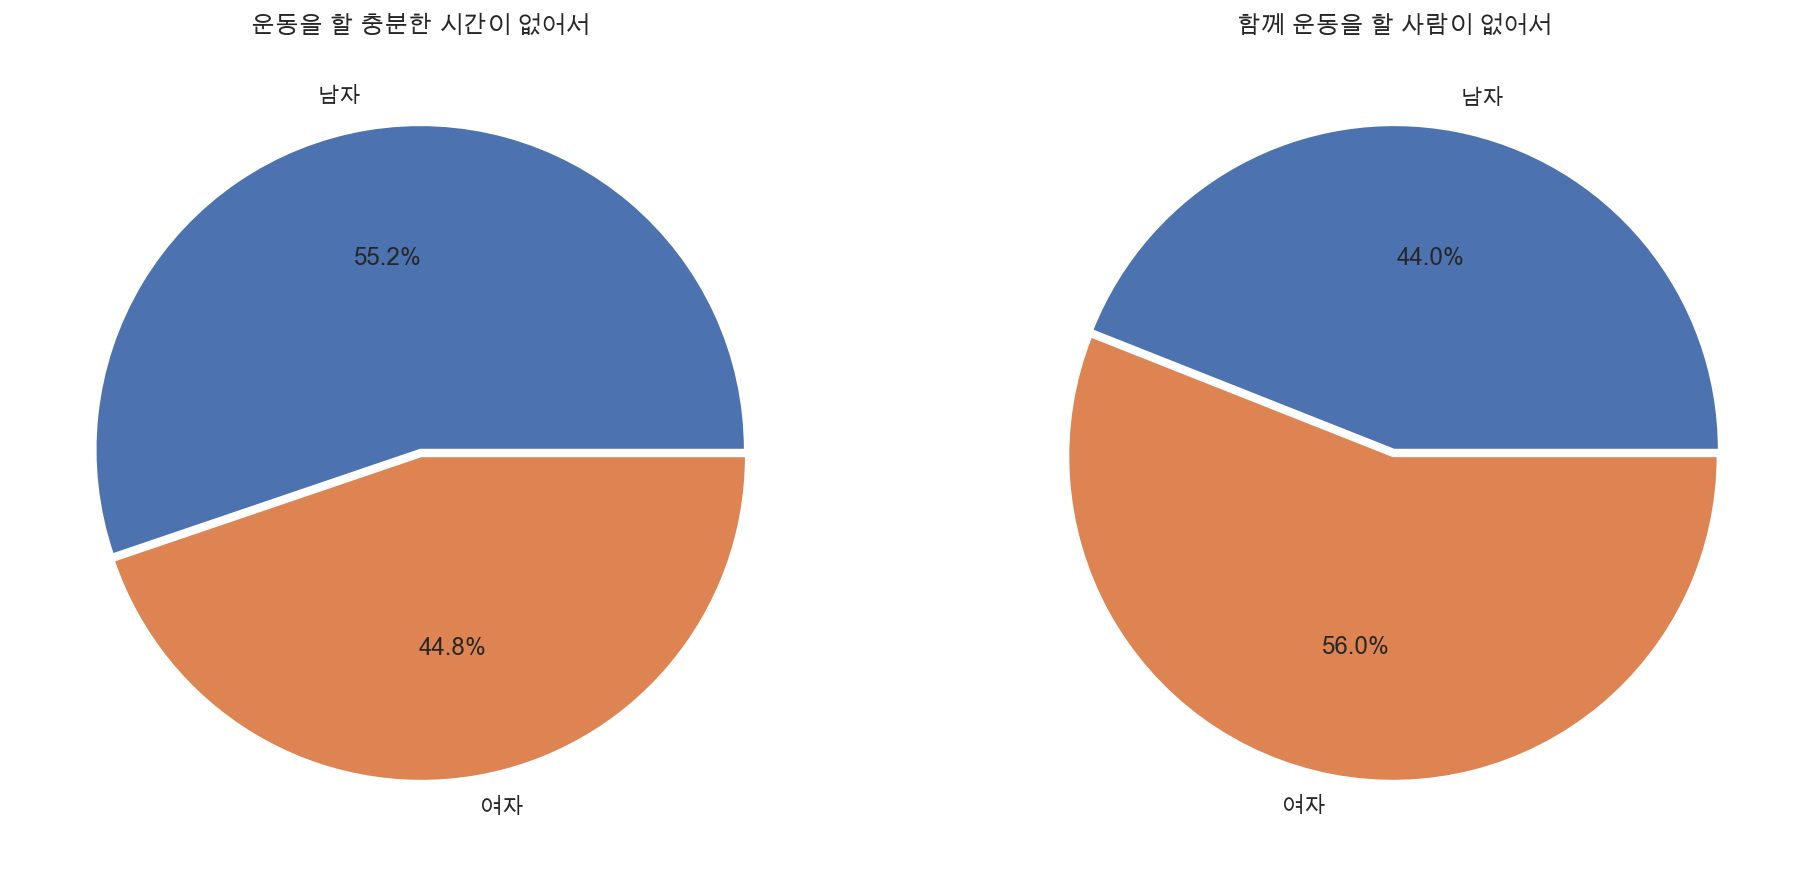

In [53]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

raw_data_sex['운동을 할 충분한 시간이 없어서'].plot(kind='pie', explode=(0,0.02), ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')

raw_data_sex['함께 운동을 할 사람이 없어서'].plot(kind='pie', explode=(0,0.02), ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('함께 운동을 할 사람이 없어서')
ax[1].set_ylabel('');

# 흡연률 데이터 분석

In [29]:
raw_data = pd.read_csv('./data/report2.txt', sep='\t')
raw_data.head()

,기간,구분,구분.1,전체,남자,여자
0,2018,서울시,서울시,18.6,34.4,3.6
1,2018,생애주기별,19~29세,18.9,31.4,6.6
2,2018,생애주기별,30~44세,22.8,41.5,3.7
3,2018,생애주기별,45~64세,19.7,37.9,3
4,2018,생애주기별,65세 이상,9.1,18.1,1.7


In [30]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      39 non-null     int64  
 1   구분      39 non-null     object 
 2   구분.1    39 non-null     object 
 3   전체      39 non-null     float64
 4   남자      39 non-null     float64
 5   여자      39 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ KB


In [32]:
raw_data['구분'].unique()

array(['서울시', '생애주기별', '교육수준별Ⅰ(30~64세)', '교육수준별Ⅱ(65세 이상)', '직업별(30~64세)',
       '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [33]:
raw_data['구분.1'].unique()

array(['서울시', '19~29세', '30~44세', '45~64세', '65세 이상', '중졸이하', '고졸',
       '대졸이상', '초졸이하', '중졸', '고졸이상', '육체직', '서비스ㆍ판매직', '사무직', '종로구', '중구',
       '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구',
       '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [34]:
raw_data[raw_data['구분'] == '생애주기별']

,기간,구분,구분.1,전체,남자,여자
1,2018,생애주기별,19~29세,18.9,31.4,6.6
2,2018,생애주기별,30~44세,22.8,41.5,3.7
3,2018,생애주기별,45~64세,19.7,37.9,3
4,2018,생애주기별,65세 이상,9.1,18.1,1.7


In [36]:
raw_data[raw_data['구분'] == '생애주기별'][['구분.1', '전체','남자','여자']]

,구분.1,전체,남자,여자
1,19~29세,18.9,31.4,6.6
2,30~44세,22.8,41.5,3.7
3,45~64세,19.7,37.9,3
4,65세 이상,9.1,18.1,1.7


In [37]:
smoke_age = raw_data[raw_data['구분'] == '생애주기별'][['구분.1', '전체','남자','여자']]
smoke_age

,구분.1,전체,남자,여자
1,19~29세,18.9,31.4,6.6
2,30~44세,22.8,41.5,3.7
3,45~64세,19.7,37.9,3
4,65세 이상,9.1,18.1,1.7


In [38]:
import seaborn as sns
%matplotlib inline

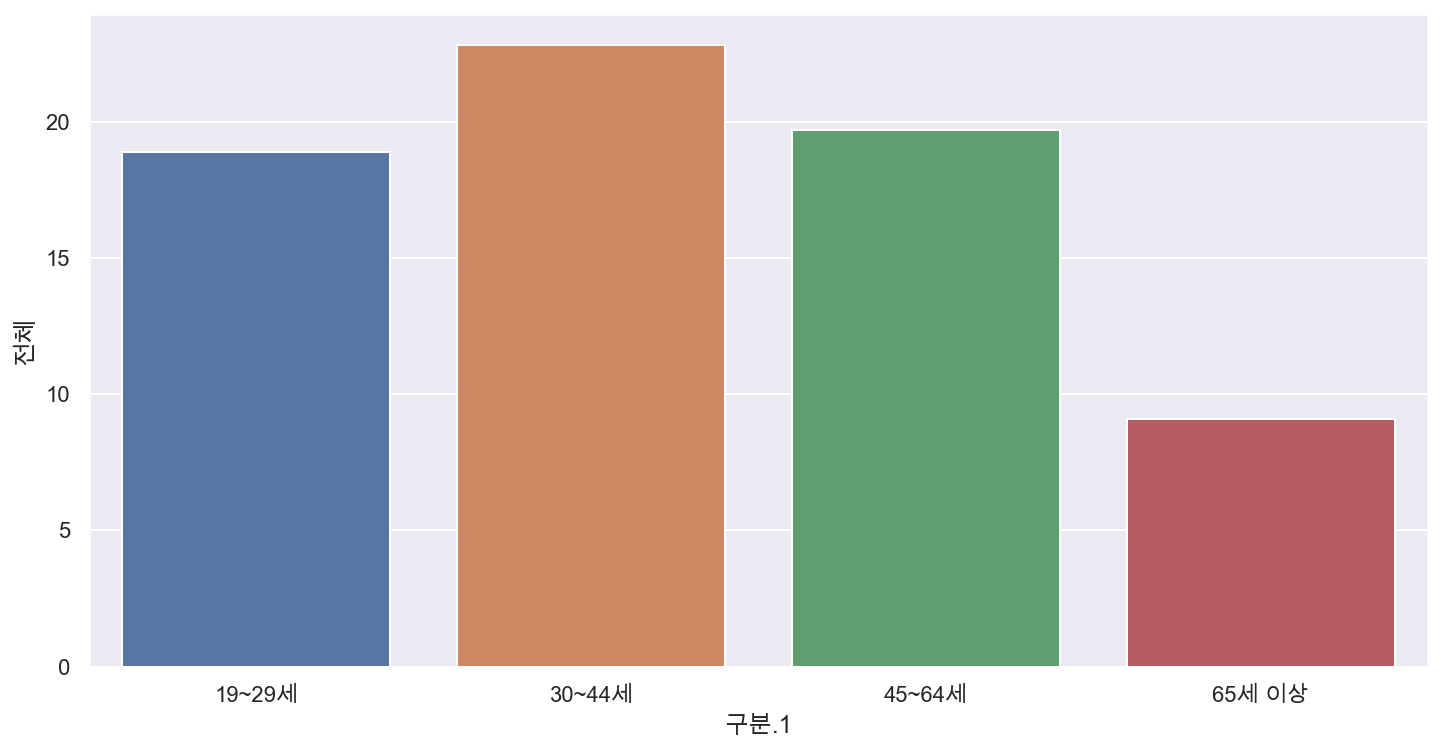

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x='구분.1', y='전체', data=smoke_age)
plt.show()

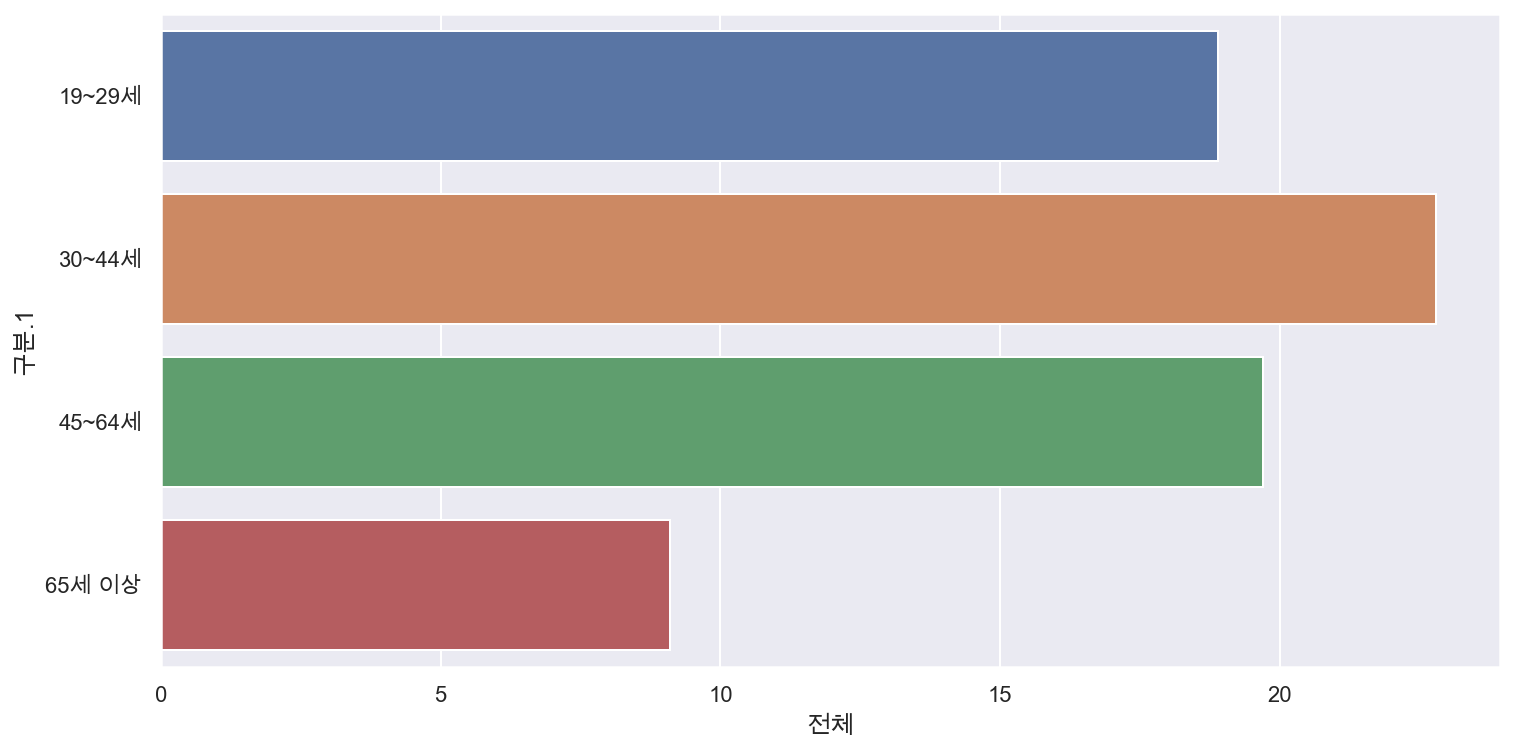

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x='전체', y='구분.1', data=smoke_age);

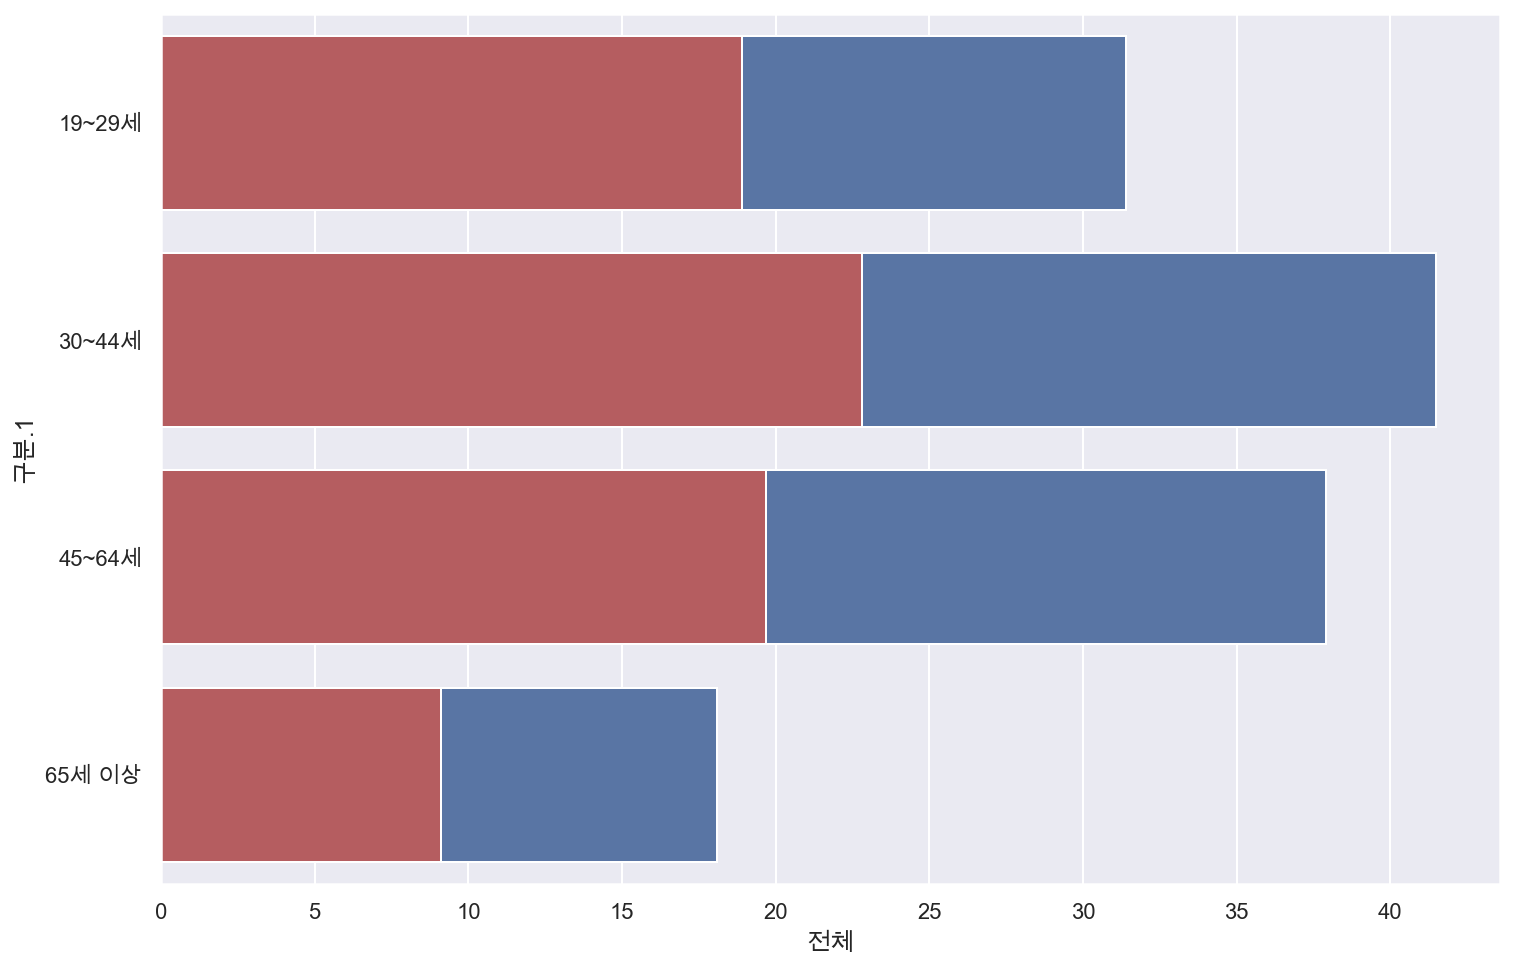

In [47]:
f, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='남자', y='구분.1', data=smoke_age, color='b')
sns.barplot(x='전체', y='구분.1', data=smoke_age, color='r')
plt.show()

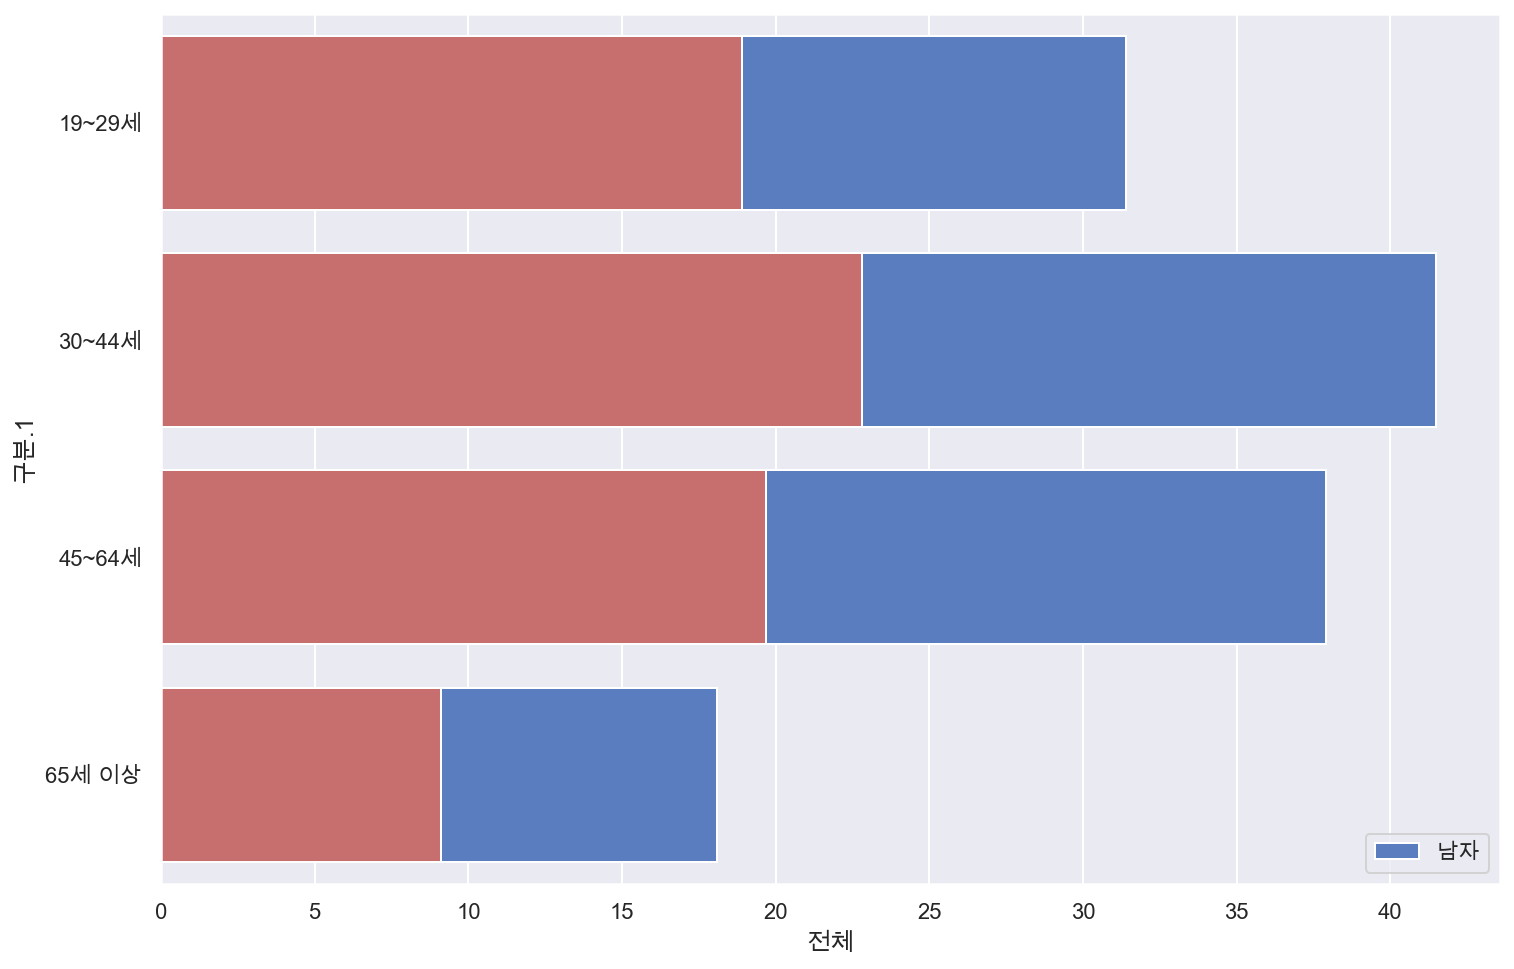

In [56]:
f, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='남자', y='구분.1', data=smoke_age, label='남자', color='b')
sns.barplot(x='전체', y='구분.1', data=smoke_age, color='r')
ax.legend(loc='lower right')
plt.show()

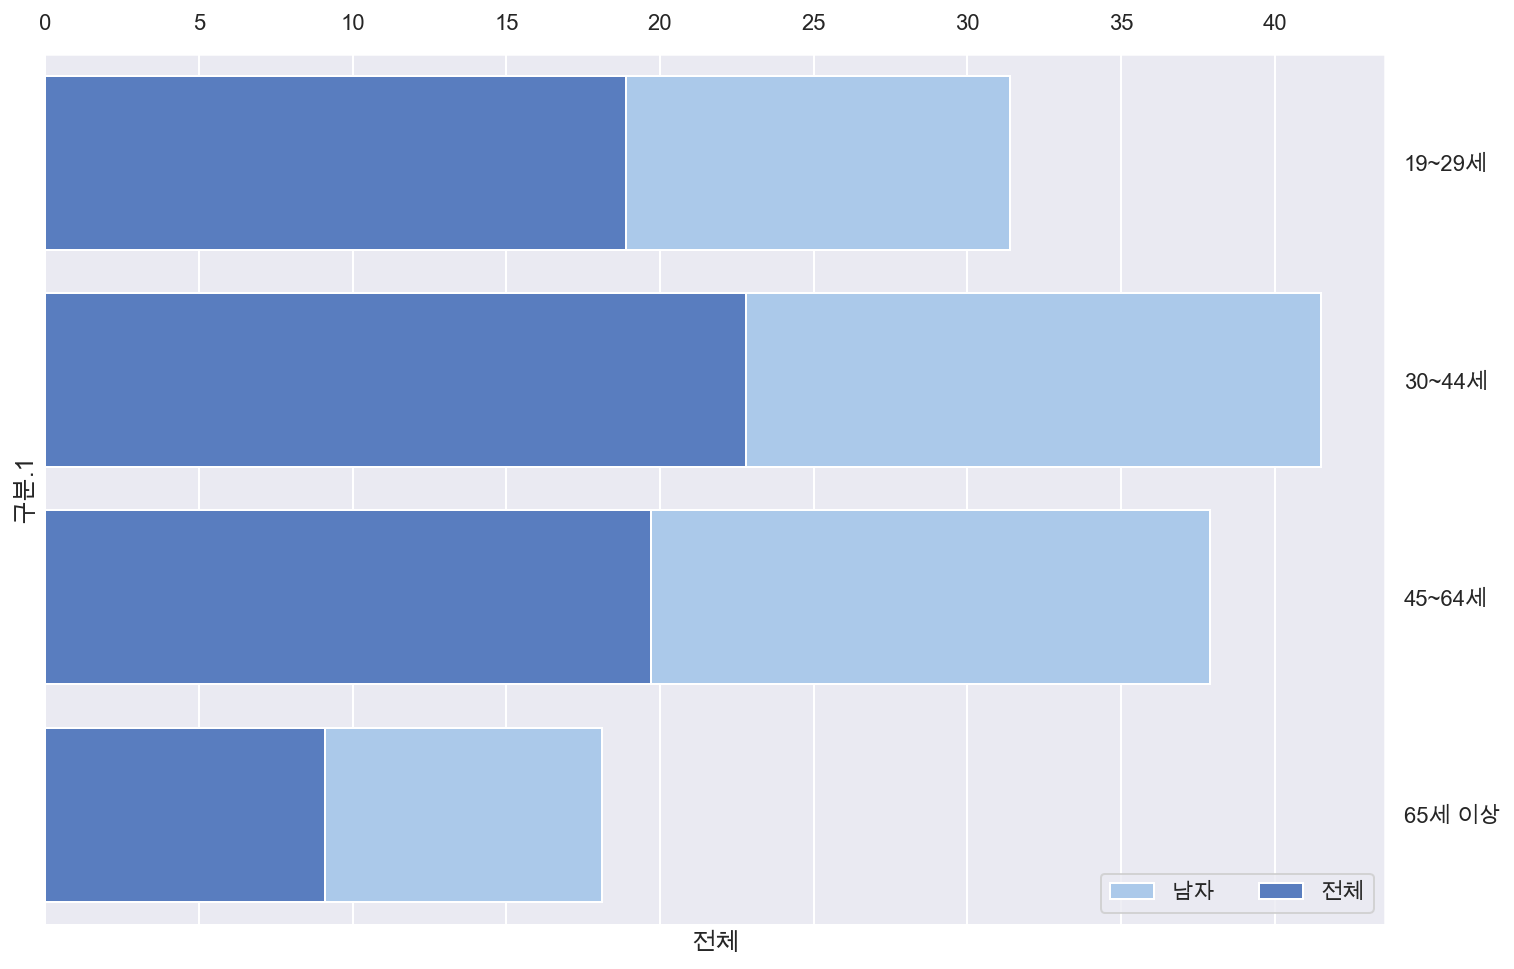

In [55]:
f, ax = plt.subplots(figsize=(12,8))
sns.set_color_codes('pastel')
sns.barplot(x='남자', y='구분.1', data=smoke_age, label='남자',  color='b')

sns.set_color_codes('muted')
sns.barplot(x='전체', y='구분.1', data=smoke_age, label='전체', color='b')
ax.legend(ncol = 2, loc='lower right')
sns.despine(left=True, bottom=True, top=False, right=False)

plt.show()

# 인구 통계 자료

In [58]:
pop_seoul = pd.read_csv('./data/report3.txt', sep='\t')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.3/4,합계,"4,405,833","9,953,009","4,840,912","5,112,097","9,699,232","4,719,170","4,980,062","253,777","121,742","132,035",2.2,"1,552,356"
3,2020.3/4,종로구,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2,"28,396"
4,2020.3/4,중구,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"


In [59]:
pop_seoul = pd.read_csv('./data/report3.txt', sep='\t', header=2, thousands=',')
pop_seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.3/4,합계,4405833,9953009,4840912,5112097,9699232,4719170,4980062,253777,121742,132035,2.20,1552356
1,2020.3/4,종로구,74861,159842,77391,82451,149952,73024,76928,9890,4367,5523,2.00,28396
2,2020.3/4,중구,63594,135321,66193,69128,125800,61526,64274,9521,4667,4854,1.98,24265
3,2020.3/4,용산구,112451,244953,119074,125879,229786,110604,119182,15167,8470,6697,2.04,39995
4,2020.3/4,성동구,136096,302695,147582,155113,295591,144444,151147,7104,3138,3966,2.17,45372


In [60]:
pop_seoul = pop_seoul[['자치구', '계', '남자','여자', '계.2', '65세이상고령자']]
pop_seoul.head()

,자치구,계,남자,여자,계.2,65세이상고령자
0,합계,9953009,4840912,5112097,253777,1552356
1,종로구,159842,77391,82451,9890,28396
2,중구,135321,66193,69128,9521,24265
3,용산구,244953,119074,125879,15167,39995
4,성동구,302695,147582,155113,7104,45372


In [61]:
pop_seoul.columns = [ '구', '전체', '남자', '여자' ,'외국인', '65세이상']
pop_seoul.head()

,구,전체,남자,여자,외국인,65세이상
0,합계,9953009,4840912,5112097,253777,1552356
1,종로구,159842,77391,82451,9890,28396
2,중구,135321,66193,69128,9521,24265
3,용산구,244953,119074,125879,15167,39995
4,성동구,302695,147582,155113,7104,45372


In [63]:
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

KeyError: '[0] not found in axis'

In [64]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['전체'] * 100
pop_seoul['고령자비율'] = pop_seoul['65세이상'] / pop_seoul['전체'] * 100
pop_seoul.head()

<ipython-input-64-304d0f383a56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['전체'] * 100
<ipython-input-64-304d0f383a56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_seoul['고령자비율'] = pop_seoul['65세이상'] / pop_seoul['전체'] * 100


,구,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
1,종로구,159842,77391,82451,9890,28396,6.187360,17.765043
2,중구,135321,66193,69128,9521,24265,7.035863,17.931437
3,용산구,244953,119074,125879,15167,39995,6.191800,16.327622
4,성동구,302695,147582,155113,7104,45372,2.346917,14.989346
5,광진구,361923,174077,187846,13859,50047,3.829268,13.828079


In [65]:
pop_seoul.sort_values(by='전체', ascending=False).head()

,구,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
24,송파구,676673,326602,350071,6342,92149,0.937233,13.617951
16,강서구,589536,284747,304789,5992,88052,1.016393,14.935814
23,강남구,544085,260358,283727,4850,73942,0.891405,13.590156
11,노원구,529532,255618,273914,4046,84612,0.764071,15.978638
21,관악구,514555,257638,256917,15981,78206,3.105790,15.198764


In [66]:
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
19,영등포구,405982,202624,203358,30352,60826,7.476194,14.982438
2,중구,135321,66193,69128,9521,24265,7.035863,17.931437
18,금천구,249641,127292,122349,17484,39361,7.003657,15.767041
17,구로구,435751,217380,218371,30172,69312,6.924138,15.906332
3,용산구,244953,119074,125879,15167,39995,6.191800,16.327622


In [67]:
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
9,강북구,313550,152458,161092,3554,62951,1.133472,20.076862
10,도봉구,329300,160526,168774,2052,61388,0.623140,18.641968
2,중구,135321,66193,69128,9521,24265,7.035863,17.931437
1,종로구,159842,77391,82451,9890,28396,6.187360,17.765043
12,은평구,485842,233104,252738,4296,84353,0.884238,17.362229


In [68]:
pop_seoul.set_index('구', inplace=True)
pop_seoul.head()

,전체,남자,여자,외국인,65세이상,외국인비율,고령자비율
구,,,,,,,
종로구,159842,77391,82451,9890,28396,6.187360,17.765043
중구,135321,66193,69128,9521,24265,7.035863,17.931437
용산구,244953,119074,125879,15167,39995,6.191800,16.327622
성동구,302695,147582,155113,7104,45372,2.346917,14.989346
광진구,361923,174077,187846,13859,50047,3.829268,13.828079


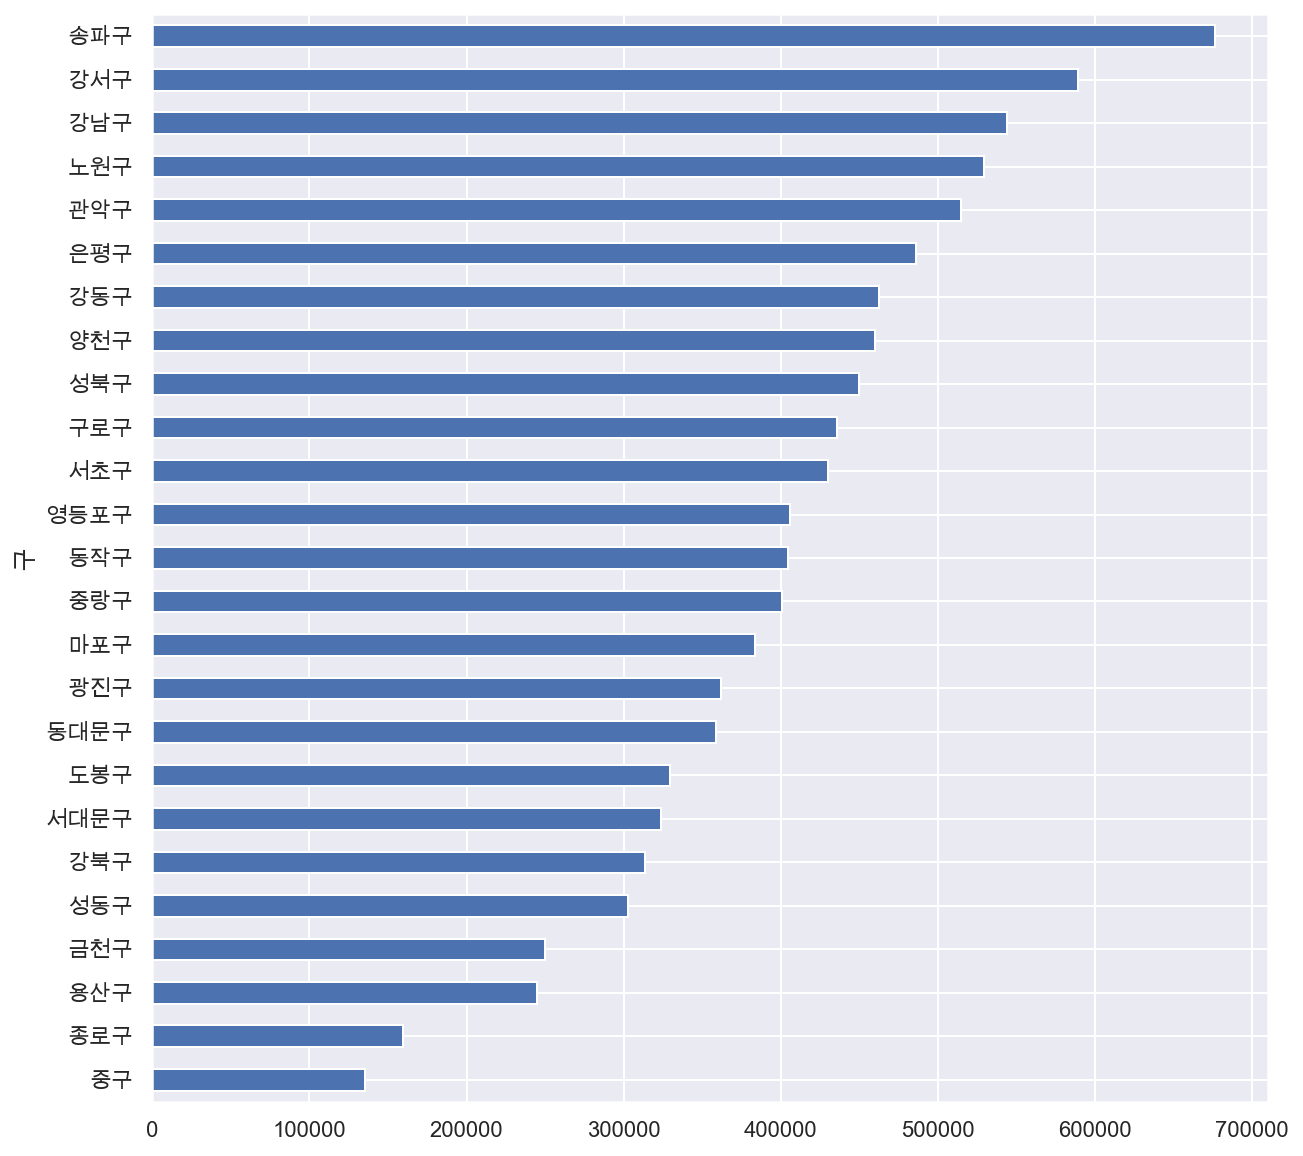

In [70]:
pop_seoul['전체'].sort_values().plot(kind='barh', grid=True, figsize=(10,10));

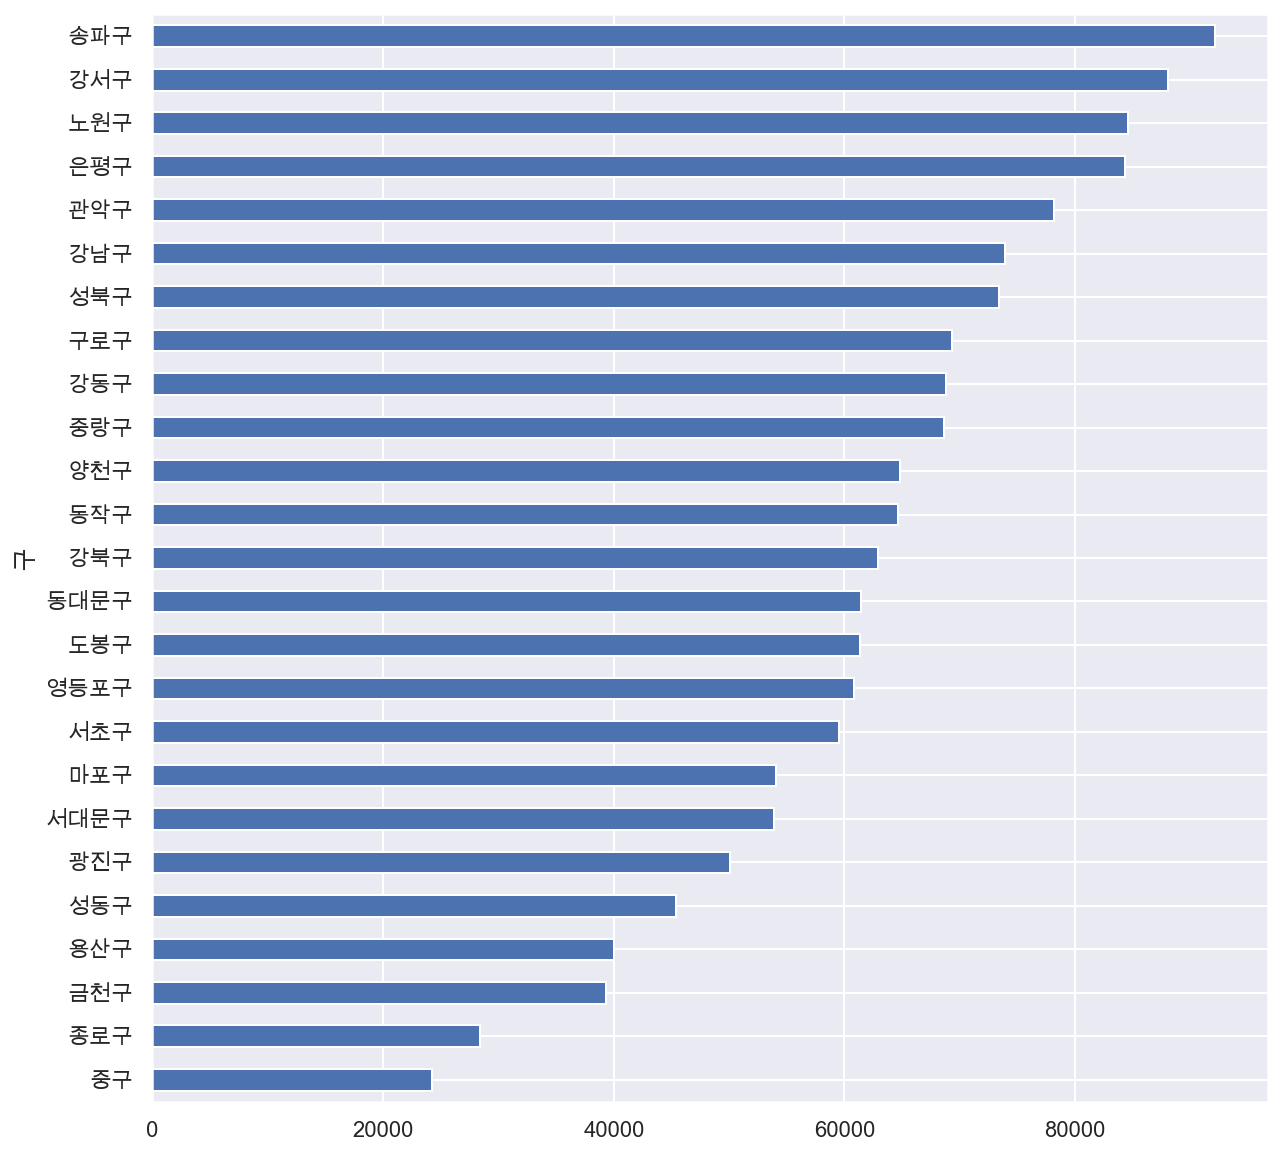

In [71]:
pop_seoul['65세이상'].sort_values().plot(kind='barh', grid=True, figsize=(10,10));

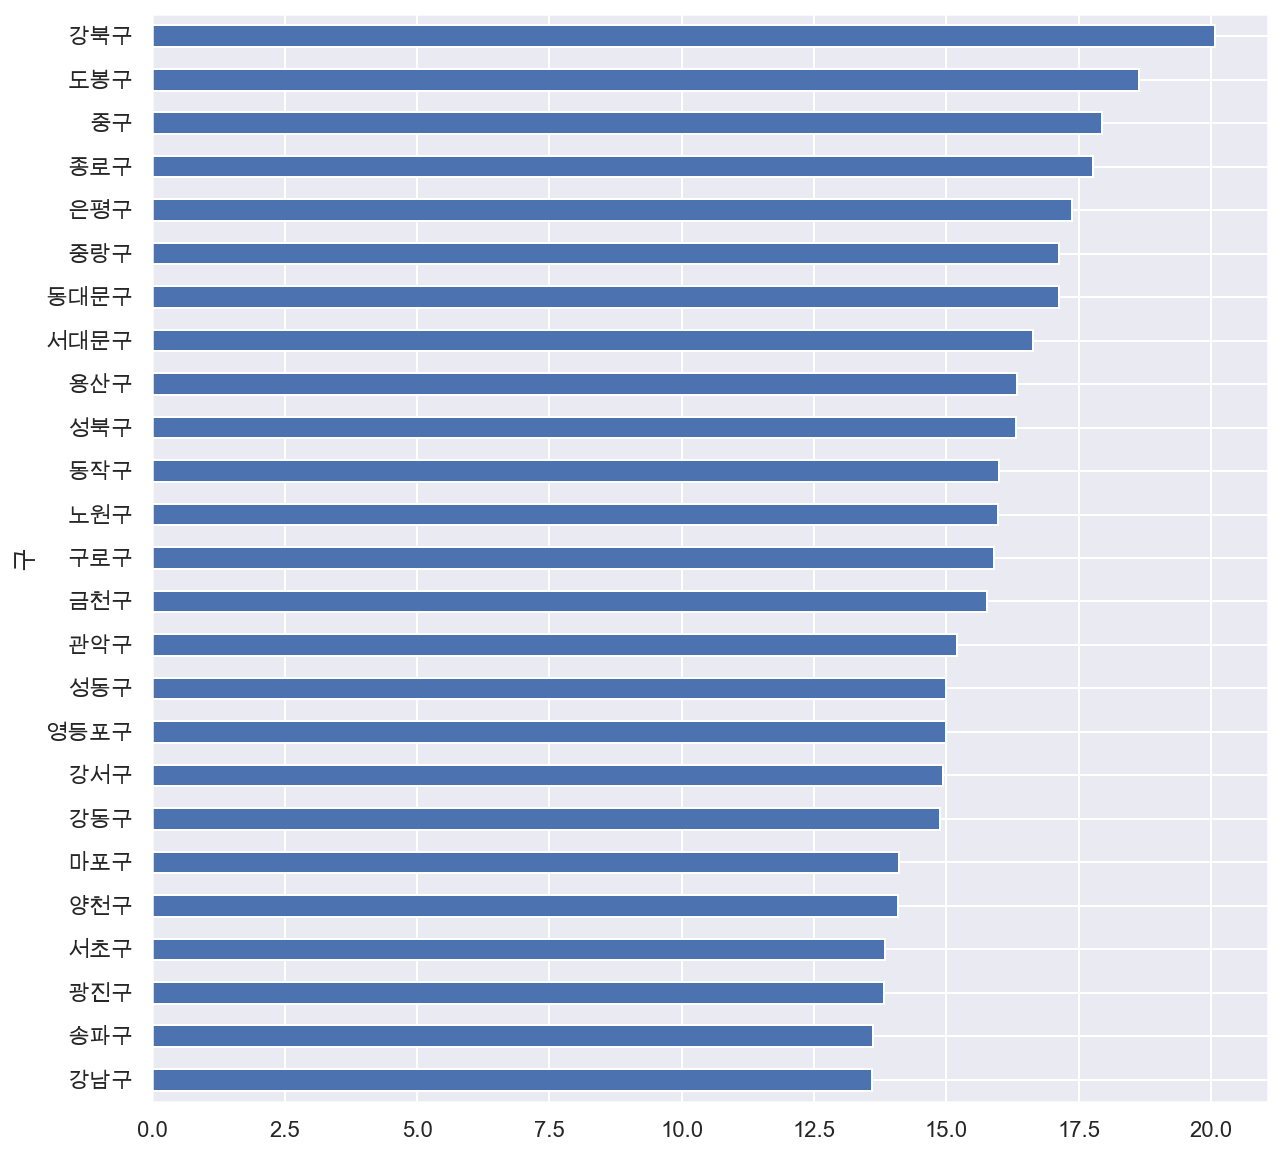

In [72]:
pop_seoul['고령자비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10));

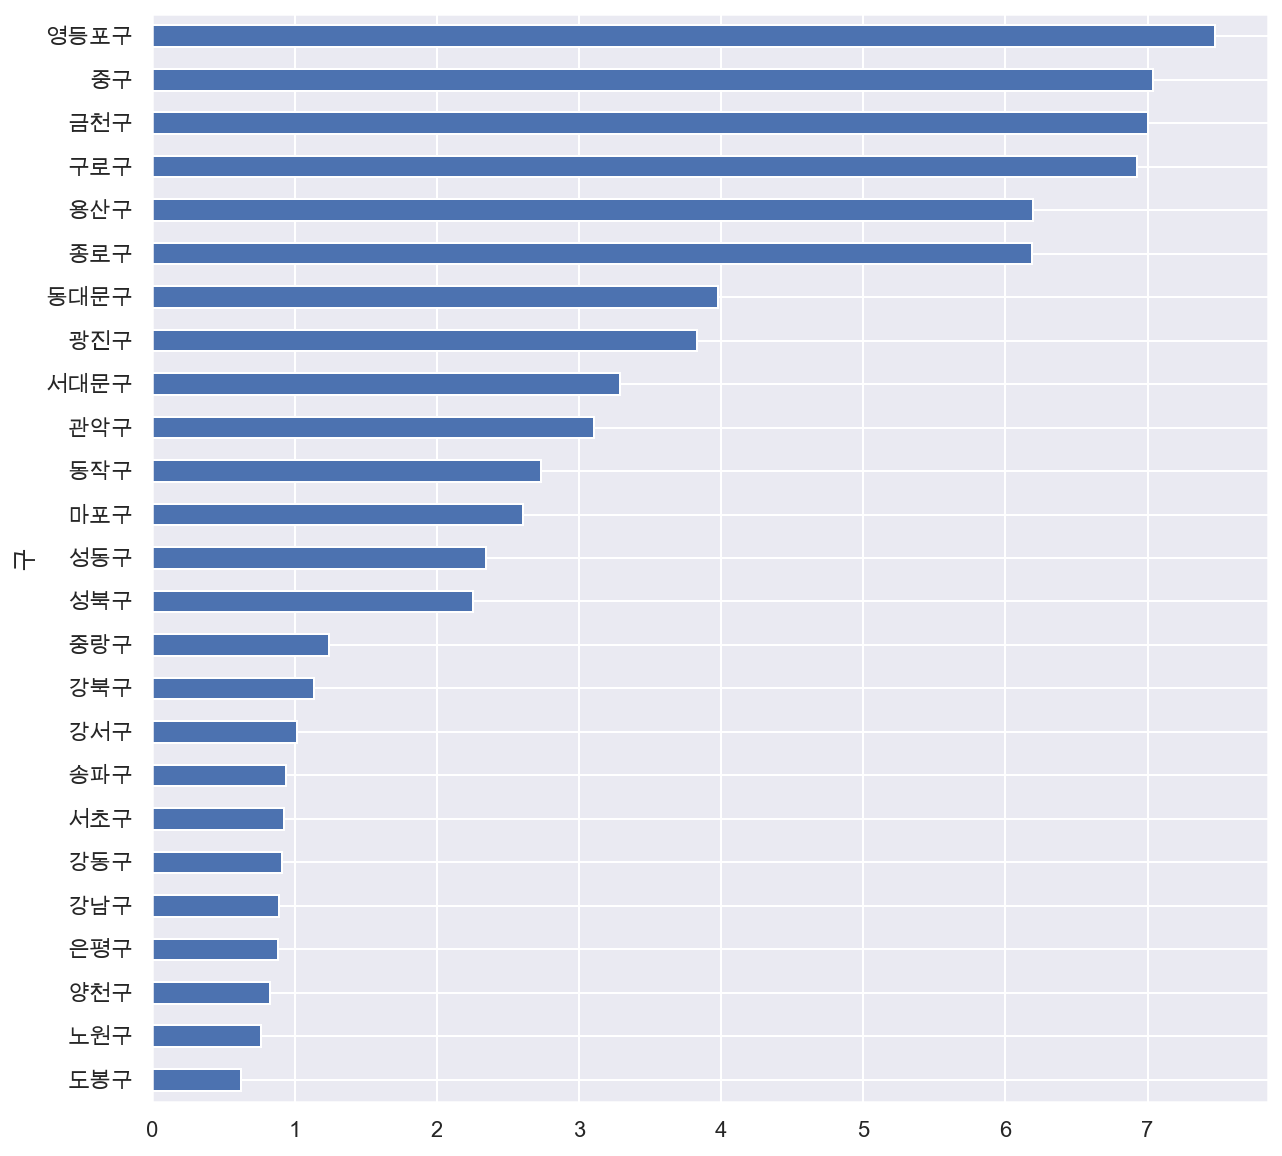

In [73]:
pop_seoul['외국인비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10));

# 살짝 파이썬

In [74]:
for each in [0,1,2,3,4,5]:
    print(each)

0
1
2
3
4
5


In [75]:
for each in range(6):
    print(each)

0
1
2
3
4
5


In [77]:
x = [1,2,3,4,5]
y = []

for n in x:
    y.append(n**2)
    
y

[1, 4, 9, 16, 25]

In [80]:
y2 = [n**2 for n in x]
y2

[1, 4, 9, 16, 25]

In [81]:
import numpy as np

x = np.array(x)
y = x**2

y

array([ 1,  4,  9, 16, 25])

In [82]:
a = [3,4,5]
for i in range(len(a)):
    a[i] += 3
    
a

[6, 7, 8]

In [83]:
a = [3,4,5]
a = [i + 3 for i in a]
a

[6, 7, 8]

In [84]:
d = ['a', 'b', 'c']
if 'a' in d:
    print('a in d')

a in d


In [86]:
x = [1,2,3,4,5]
y = []

for n in x:
    if n%2 != 1:
        y.append(n**2)
        
y

[4, 16]

In [87]:
x = [1,2,3,4,5]
y = [n**2 for n in x if n%2 != 1]
y

[4, 16]

# pivot_table

In [97]:
df = pd.read_excel('./data/02. sales-funnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [98]:
pd.pivot_table(df, index=['Name'])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [99]:
pd.pivot_table(df, index=['Name','Rep','Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [100]:
pd.pivot_table(df, index=['Manager','Rep'])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

In [101]:
pd.pivot_table(df, index=['Manager','Rep'], values=['Price'])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [106]:
pd.pivot_table(df, index=['Manager','Rep'], values=['Price'], aggfunc=[np.mean,len])

mean   len
                                    Price Price
Manager       Rep                              
Debra Henley  Craig Booker   20000.000000     4
              Daniel Hilton  38333.333333     3
              John Smith     20000.000000     2
Fred Anderson Cedric Moss    27500.000000     4
              Wendy Yule     44250.000000     4

In [108]:
pd.pivot_table(df, index=['Manager','Rep'],values=['Price'], columns=['Product'], aggfunc=[np.sum])

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [109]:
pd.pivot_table(df, index=['Manager','Rep'], values=['Price'], columns=['Product'], aggfunc=[np.sum], fill_value=0)

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [ ]:
pd.pivot_table(df, index=['Manager','Rep','Product'], values=['Price, Quantity'], aggfunc=[])

# 서울시 범죄현황 데이터

In [1]:
crime_raw_data = pd.read_csv('./data/2017년.csv', encoding='euc-kr')
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,0
1,중부,살인,검거,0
2,중부,강도,발생,6
3,중부,강도,검거,6
4,중부,강간,발생,173


In [2]:
## null 아닌 것만 
crime_raw_data = crime_raw_data[crime_raw_data['죄종'].notnull()]
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 12.1+ KB


In [3]:
crime_station = crime_raw_data.pivot_table(crime_raw_data, index=['구분'], columns=['죄종','발생검거'], aggfunc=[np.sum])
crime_station.head()

sum                                             
       건수                                             
죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    366  456  16  13   6   6   787  2069  1942  2229
강동    169  172  12  10   6   5   949  1645  2109  2429
강북    153  208   5   7   8   8   635  1014  2023  2156
강서    253  316   6   4  11  11  1113  1888  2544  2916
관악    323  379   6   7   7   8  1152  1979  2666  3152

In [4]:
## column의 index를 보기
crime_station.columns

MultiIndex([('sum', '건수', '강간', '검거'),
            ('sum', '건수', '강간', '발생'),
            ('sum', '건수', '강도', '검거'),
            ('sum', '건수', '강도', '발생'),
            ('sum', '건수', '살인', '검거'),
            ('sum', '건수', '살인', '발생'),
            ('sum', '건수', '절도', '검거'),
            ('sum', '건수', '절도', '발생'),
            ('sum', '건수', '폭력', '검거'),
            ('sum', '건수', '폭력', '발생')],
           names=[None, None, '죄종', '발생검거'])

In [5]:
crime_station.columns = crime_station.columns.droplevel([0,1])
crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [6]:
## 컬럼 한줄로 만들기
crime_station.columns = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229
강동,169,172,12,10,6,5,949,1645,2109,2429
강북,153,208,5,7,8,8,635,1014,2023,2156
강서,253,316,6,4,11,11,1113,1888,2544,2916
관악,323,379,6,7,7,8,1152,1979,2666,3152


In [7]:
## '구' 라는 컬럼 새로 만들기
tmp_gu = []

station_names = ['혜화','남대문', '중부','종암', '서부', '방배', '수서']
gu_names = ['종로구', '중구','중구', '성북구', '은평구', '서초구' , '강남구' ]

for idx, _ in crime_station.iterrows():
    if idx in station_names:
        tmp_gu.append(gu_names[station_names.index(idx)])
    else :
        tmp_gu.append(idx+'구')
        
print(tmp_gu)

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '중구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서초구', '서대문구', '은평구', '서초구', '성동구', '성북구', '송파구', '강남구', '양천구', '영등포구', '용산구', '은평구', '종로구', '성북구', '중랑구', '중구', '종로구']


In [8]:
crime_station['구'] = tmp_gu
crime_station.head(), len(crime_station)

(    강간검거  강간발생  강도검거  강도발생  살인검거  살인발생  절도검거  절도발생  폭력검거  폭력발생    구
 구분                                                                 
 강남   366   456    16    13     6     6   787  2069  1942  2229  강남구
 강동   169   172    12    10     6     5   949  1645  2109  2429  강동구
 강북   153   208     5     7     8     8   635  1014  2023  2156  강북구
 강서   253   316     6     4    11    11  1113  1888  2544  2916  강서구
 관악   323   379     6     7     7     8  1152  1979  2666  3152  관악구,
 31)

In [9]:
## "구" 기준으로 피봇
crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)
crime_gu.head(), len(crime_gu)

(     강간검거  강간발생  강도검거  강도발생  살인검거  살인발생  절도검거  절도발생  폭력검거  폭력발생
 구                                                              
 강남구   496   607    24    20     7     7  1383  3130  3411  3956
 강동구   169   172    12    10     6     5   949  1645  2109  2429
 강북구   153   208     5     7     8     8   635  1014  2023  2156
 강서구   253   316     6     4    11    11  1113  1888  2544  2916
 관악구   323   379     6     7     7     8  1152  1979  2666  3152,
 25)

In [10]:
## ' 구' 별 살인 발생 확인
crime_gu['살인발생'].sort_values(ascending=False).head()

구
영등포구    15
강서구     11
동대문구    11
서초구      9
강북구      8
Name: 살인발생, dtype: int64

In [11]:
## 단순 나누기
## crime_gu[['강도검거', '강도발생']].div(crime_gu['강간발생'], axis=0)

In [12]:
## 검거율 만들기
target = ['강간검거율' , '강도검거율', '살인검거율' ,'절도검거율' , '폭력검거율']
num = ['강간검거' , '강도검거', '살인검거' ,'절도검거' , '폭력검거']
den = ['강간발생', '강도발생', '살인발생' , '절도발생' ,'폭력발생']

crime_gu[target] = round(crime_gu[num].div(crime_gu[den].to_numpy()) * 100, 3)
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956,81.713,120.000,100.0,44.185,86.223
강동구,169,172,12,10,6,5,949,1645,2109,2429,98.256,120.000,120.0,57.690,86.826
강북구,153,208,5,7,8,8,635,1014,2023,2156,73.558,71.429,100.0,62.623,93.831
강서구,253,316,6,4,11,11,1113,1888,2544,2916,80.063,150.000,100.0,58.951,87.243
관악구,323,379,6,7,7,8,1152,1979,2666,3152,85.224,85.714,87.5,58.211,84.581


In [13]:
## 사건 검거 컬럼 지우기

In [14]:
crime_gu.drop(columns=num, inplace=True)
crime_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713,120.000,100.0,44.185,86.223
강동구,172,10,5,1645,2429,98.256,120.000,120.0,57.690,86.826
강북구,208,7,8,1014,2156,73.558,71.429,100.0,62.623,93.831
강서구,316,4,11,1888,2916,80.063,150.000,100.0,58.951,87.243
관악구,379,7,8,1979,3152,85.224,85.714,87.5,58.211,84.581


In [15]:
## 검거율 100 이상이면 100으로,

In [16]:
crime_gu[crime_gu[target] > 100] = 100
crime_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713,100.000,100.0,44.185,86.223
강동구,172,10,5,1645,2429,98.256,100.000,100.0,57.690,86.826
강북구,208,7,8,1014,2156,73.558,71.429,100.0,62.623,93.831
강서구,316,4,11,1888,2916,80.063,100.000,100.0,58.951,87.243
관악구,379,7,8,1979,3152,85.224,85.714,87.5,58.211,84.581


In [17]:
## 사건발생 -> 사건

In [18]:
crime_gu.rename(columns={'강간발생': '강간', '강도발생': '강도', '살인발생': '살인' , '절도발생': '절도' ,'폭력발생':'폭력'}, inplace=True)
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713,100.000,100.0,44.185,86.223
강동구,172,10,5,1645,2429,98.256,100.000,100.0,57.690,86.826
강북구,208,7,8,1014,2156,73.558,71.429,100.0,62.623,93.831
강서구,316,4,11,1888,2916,80.063,100.000,100.0,58.951,87.243
관악구,379,7,8,1979,3152,85.224,85.714,87.5,58.211,84.581


In [19]:
## 발생 정규화

In [180]:
col = ['강간', '강도', '살인', '절도', '폭력']
crime_gu_norm = round(crime_gu[col] / crime_gu[col].max(),3)
crime_gu_norm

,강간,강도,살인,절도,폭력
구,,,,,
강남구,1.000,1.00,0.467,1.000,1.000
강동구,0.283,0.50,0.333,0.526,0.614
강북구,0.343,0.35,0.533,0.324,0.545
강서구,0.521,0.20,0.733,0.603,0.737
관악구,0.624,0.35,0.533,0.632,0.797
광진구,0.430,0.65,0.400,0.709,0.542
구로구,0.540,0.40,0.467,0.551,0.715
금천구,0.395,0.25,0.333,0.365,0.474
노원구,0.297,0.45,0.267,0.491,0.626


In [182]:
crime_gu_norm[target] = crime_gu[target]
crime_gu_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.000,1.00,0.467,1.000,1.000,81.713,100.000,100.0,44.185,86.223
강동구,0.283,0.50,0.333,0.526,0.614,98.256,100.000,100.0,57.690,86.826
강북구,0.343,0.35,0.533,0.324,0.545,73.558,71.429,100.0,62.623,93.831
강서구,0.521,0.20,0.733,0.603,0.737,80.063,100.000,100.0,58.951,87.243
관악구,0.624,0.35,0.533,0.632,0.797,85.224,85.714,87.5,58.211,84.581


In [ ]:
## 범죄, 검거 점수 평균으로 구하여 새로운 컬럼으로

In [187]:
crime_gu_norm['범죄'] = crime_gu_norm[col].mean(axis=1)
crime_gu_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄
구,,,,,,,,,,,
강남구,1.000,1.00,0.467,1.000,1.000,81.713,100.000,100.0,44.185,86.223,0.8934
강동구,0.283,0.50,0.333,0.526,0.614,98.256,100.000,100.0,57.690,86.826,0.4512
강북구,0.343,0.35,0.533,0.324,0.545,73.558,71.429,100.0,62.623,93.831,0.4190
강서구,0.521,0.20,0.733,0.603,0.737,80.063,100.000,100.0,58.951,87.243,0.5588
관악구,0.624,0.35,0.533,0.632,0.797,85.224,85.714,87.5,58.211,84.581,0.5872


In [188]:
col2 = ['강간검거율' , '강도검거율', '살인검거율' ,'절도검거율' , '폭력검거율']
crime_gu_norm['검거'] = crime_gu_norm[col2].mean(axis=1)
crime_gu_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거
구,,,,,,,,,,,,
강남구,1.000,1.00,0.467,1.000,1.000,81.713,100.000,100.0,44.185,86.223,0.8934,82.4242
강동구,0.283,0.50,0.333,0.526,0.614,98.256,100.000,100.0,57.690,86.826,0.4512,88.5544
강북구,0.343,0.35,0.533,0.324,0.545,73.558,71.429,100.0,62.623,93.831,0.4190,80.2882
강서구,0.521,0.20,0.733,0.603,0.737,80.063,100.000,100.0,58.951,87.243,0.5588,85.2514
관악구,0.624,0.35,0.533,0.632,0.797,85.224,85.714,87.5,58.211,84.581,0.5872,80.2460


tmp = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)
tmp

In [14]:
crime_station.columns = tmp

In [15]:
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229
강동,169,172,12,10,6,5,949,1645,2109,2429
강북,153,208,5,7,8,8,635,1014,2023,2156
강서,253,316,6,4,11,11,1113,1888,2544,2916
관악,323,379,6,7,7,8,1152,1979,2666,3152


In [17]:
crime_station.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

In [18]:
station_names = ['혜화','남대문', '중부','종암', '서부', '방배', '수서']
gu_names = ['종로구', '중구','중구', '성북구', '은평구', '서초구' , '강남구' ]

In [24]:
tmp_gu = []
for idx, _ in crime_station.iterrows():
    if idx in station_names:
        tmp_gu.append(gu_names[station_names.index(idx)])
    else:
        tmp_gu.append(idx+'구')

In [25]:
crime_station['구'] = tmp_gu
crime_station

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229,강남구
강동,169,172,12,10,6,5,949,1645,2109,2429,강동구
강북,153,208,5,7,8,8,635,1014,2023,2156,강북구
강서,253,316,6,4,11,11,1113,1888,2544,2916,강서구
관악,323,379,6,7,7,8,1152,1979,2666,3152,관악구
광진,208,261,8,13,5,6,1168,2220,1900,2146,광진구
구로,181,328,6,8,8,7,869,1725,2344,2827,구로구
금천,212,240,5,5,5,5,674,1141,1676,1874,금천구
남대문,62,94,3,3,0,1,400,785,780,863,중구


In [26]:
crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)

crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956
강동구,169,172,12,10,6,5,949,1645,2109,2429
강북구,153,208,5,7,8,8,635,1014,2023,2156
강서구,253,316,6,4,11,11,1113,1888,2544,2916
관악구,323,379,6,7,7,8,1152,1979,2666,3152


In [27]:
crime_gu['살인발생'].sort_values(ascending=False).head()

구
영등포구    15
강서구     11
동대문구    11
서초구      9
강북구      8
Name: 살인발생, dtype: int64

In [28]:
crime_gu['폭력발생'].sort_values(ascending=False).head()

구
강남구     3956
영등포구    3190
관악구     3152
송파구     3007
강서구     2916
Name: 폭력발생, dtype: int64

In [29]:
crime_gu['강도발생'].sort_values(ascending=False).head()

구
강남구    20
서초구    13
광진구    13
종로구    10
강동구    10
Name: 강도발생, dtype: int64

In [30]:
crime_gu['절도발생'].sort_values(ascending=False).head()

구
강남구     3130
영등포구    2304
송파구     2274
광진구     2220
마포구     2094
Name: 절도발생, dtype: int64

In [31]:
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956
강동구,169,172,12,10,6,5,949,1645,2109,2429
강북구,153,208,5,7,8,8,635,1014,2023,2156
강서구,253,316,6,4,11,11,1113,1888,2544,2916
관악구,323,379,6,7,7,8,1152,1979,2666,3152


In [32]:
crime_gu['강도검거'] / crime_gu['강도발생']

구
강남구     1.200000
강동구     1.200000
강북구     0.714286
강서구     1.500000
관악구     0.857143
광진구     0.615385
구로구     0.750000
금천구     1.000000
노원구     0.777778
도봉구     1.000000
동대문구    1.666667
동작구     1.285714
마포구     1.000000
서대문구    2.000000
서초구     0.538462
성동구     1.000000
성북구     1.000000
송파구     3.000000
양천구     0.666667
영등포구    1.000000
용산구     0.800000
은평구     1.000000
종로구     0.800000
중구      1.000000
중랑구     1.333333
dtype: float64

In [33]:
crime_gu[['강도검거', '살인검거']].div(crime_gu['강도발생'], axis=0)

,강도검거,살인검거
구,,
강남구,1.200000,0.350000
강동구,1.200000,0.600000
강북구,0.714286,1.142857
강서구,1.500000,2.750000
관악구,0.857143,1.000000
광진구,0.615385,0.384615
구로구,0.750000,1.000000
금천구,1.000000,1.000000
노원구,0.777778,0.444444


In [35]:
num = ['강간검거' , '강도검거', '살인검거' ,'절도검거' , '폭력검거']
den = ['강간발생', '강도발생', '살인발생' , '절도발생' ,'폭력발생']

crime_gu[num].div(crime_gu[den].values)

,강간검거,강도검거,살인검거,절도검거,폭력검거
구,,,,,
강남구,0.817133,1.200000,1.000000,0.441853,0.862235
강동구,0.982558,1.200000,1.200000,0.576900,0.868259
강북구,0.735577,0.714286,1.000000,0.626233,0.938312
강서구,0.800633,1.500000,1.000000,0.589513,0.872428
관악구,0.852243,0.857143,0.875000,0.582112,0.845812
광진구,0.796935,0.615385,0.833333,0.526126,0.885368
구로구,0.551829,0.750000,1.142857,0.503768,0.829148
금천구,0.883333,1.000000,1.000000,0.590710,0.894344
노원구,0.861111,0.777778,1.000000,0.492198,0.857143


In [36]:
target = ['강간검거율' , '강도검거율', '살인검거율' ,'절도검거율' , '폭력검거율'] 
num = ['강간검거' , '강도검거', '살인검거' ,'절도검거' , '폭력검거']
den = ['강간발생', '강도발생', '살인발생' , '절도발생' ,'폭력발생']

crime_gu[target] = crime_gu[num].div(crime_gu[den].values)* 100
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956,81.713344,120.000000,100.0,44.185304,86.223458
강동구,169,172,12,10,6,5,949,1645,2109,2429,98.255814,120.000000,120.0,57.689970,86.825854
강북구,153,208,5,7,8,8,635,1014,2023,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,253,316,6,4,11,11,1113,1888,2544,2916,80.063291,150.000000,100.0,58.951271,87.242798
관악구,323,379,6,7,7,8,1152,1979,2666,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [37]:
crime_gu = crime_gu.drop(columns=num)
crime_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,120.000000,100.0,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,120.000000,120.0,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,316,4,11,1888,2916,80.063291,150.000000,100.0,58.951271,87.242798
관악구,379,7,8,1979,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [38]:
crime_gu[target] > 100

,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,
강남구,False,True,False,False,False
강동구,False,True,True,False,False
강북구,False,False,False,False,False
강서구,False,True,False,False,False
관악구,False,False,False,False,False
광진구,False,False,False,False,False
구로구,False,False,True,False,False
금천구,False,False,False,False,False
노원구,False,False,False,False,False


In [40]:
crime_gu[crime_gu[target] > 100]  = 100
crime_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,100.000000,100.0,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,100.000000,100.0,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,316,4,11,1888,2916,80.063291,100.000000,100.0,58.951271,87.242798
관악구,379,7,8,1979,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [43]:
crime_gu.rename(columns = {'강간발생': '강간', '강도발생': '강도', '살인발생': '살인' , '절도발생': '절도' ,'폭력발생':'폭력'}, inplace=True)
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,100.000000,100.0,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,100.000000,100.0,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
강서구,316,4,11,1888,2916,80.063291,100.000000,100.0,58.951271,87.242798
관악구,379,7,8,1979,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [45]:
crime_gu.columns

Index(['강간', '강도', '살인', '절도', '폭력', '강간검거율', '강도검거율', '살인검거율', '절도검거율',
       '폭력검거율'],
      dtype='object')

In [46]:
col = ['강간', '강도', '살인', '절도', '폭력']
crime_gu_norm = crime_gu[col] / crime_gu[col].max()
crime_gu_norm.head()

,강간,강도,살인,절도,폭력
구,,,,,
강남구,1.000000,1.00,0.466667,1.000000,1.000000
강동구,0.283361,0.50,0.333333,0.525559,0.614004
강북구,0.342669,0.35,0.533333,0.323962,0.544995
강서구,0.520593,0.20,0.733333,0.603195,0.737108
관악구,0.624382,0.35,0.533333,0.632268,0.796764


In [47]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율','폭력검거율']
crime_gu_norm[col2] = crime_gu[col2]
crime_gu_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.000000,1.00,0.466667,1.000000,1.000000,81.713344,100.000000,100.0,44.185304,86.223458
강동구,0.283361,0.50,0.333333,0.525559,0.614004,98.255814,100.000000,100.0,57.689970,86.825854
강북구,0.342669,0.35,0.533333,0.323962,0.544995,73.557692,71.428571,100.0,62.623274,93.831169
강서구,0.520593,0.20,0.733333,0.603195,0.737108,80.063291,100.000000,100.0,58.951271,87.242798
관악구,0.624382,0.35,0.533333,0.632268,0.796764,85.224274,85.714286,87.5,58.211218,84.581218


In [49]:
crime_gu_norm['범죄'] = np.mean(crime_gu_norm[col], axis=1)
crime_gu_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄
구,,,,,,,,,,,
강남구,1.000000,1.00,0.466667,1.000000,1.000000,81.713344,100.000000,100.0,44.185304,86.223458,0.893333
강동구,0.283361,0.50,0.333333,0.525559,0.614004,98.255814,100.000000,100.0,57.689970,86.825854,0.451251
강북구,0.342669,0.35,0.533333,0.323962,0.544995,73.557692,71.428571,100.0,62.623274,93.831169,0.418992
강서구,0.520593,0.20,0.733333,0.603195,0.737108,80.063291,100.000000,100.0,58.951271,87.242798,0.558846
관악구,0.624382,0.35,0.533333,0.632268,0.796764,85.224274,85.714286,87.5,58.211218,84.581218,0.587350


In [54]:
crime_gu_norm['검거'] = np.mean(crime_gu_norm[col2], axis=1)
crime_gu_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거
구,,,,,,,,,,,,
강남구,1.000000,1.00,0.466667,1.000000,1.000000,81.713344,100.000000,100.0,44.185304,86.223458,0.893333,82.424421
강동구,0.283361,0.50,0.333333,0.525559,0.614004,98.255814,100.000000,100.0,57.689970,86.825854,0.451251,88.554328
강북구,0.342669,0.35,0.533333,0.323962,0.544995,73.557692,71.428571,100.0,62.623274,93.831169,0.418992,80.288141
강서구,0.520593,0.20,0.733333,0.603195,0.737108,80.063291,100.000000,100.0,58.951271,87.242798,0.558846,85.251472
관악구,0.624382,0.35,0.533333,0.632268,0.796764,85.224274,85.714286,87.5,58.211218,84.581218,0.587350,80.246199


In [55]:
crime_gu_norm['범죄'].sort_values(ascending=False).head()

구
강남구     0.893333
영등포구    0.708412
서초구     0.642180
관악구     0.587350
강서구     0.558846
Name: 범죄, dtype: float64

In [56]:
crime_gu_norm['검거'].sort_values(ascending=False).head()

구
도봉구     90.917804
은평구     90.163414
강동구     88.554328
동대문구    88.003169
금천구     87.367738
Name: 검거, dtype: float64

In [57]:
crime_gu_norm['검거'].sort_values().head()

구
중구     58.298750
종로구    69.110660
서초구    69.515640
양천구    70.412195
구로구    72.694898
Name: 검거, dtype: float64

In [ ]:
import folium
import json

crime_gu = pd.read_csv('./s')

In [ ]:
target_col = ['강간검거율' , '강도검거율' , '살인검거율', '절도검거율', '폭력검거율' , '검거']

crime_gu_norm_sort = crime_gu_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize=(10,10))